In [49]:
import pandas as pd
from sklearn import linear_model
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\guru sai reddy\Desktop\py-master\ML\5_one_hot_encoding\homeprices.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [3]:
dummies=pd.get_dummies(df.town)

In [4]:
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [5]:
merge=pd.concat([df,dummies],axis='columns')
merge

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [6]:
final=merge.drop(['town','west windsor'],axis='columns')
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [7]:
reg=linear_model.LinearRegression()

In [8]:
X=final.drop(['price'],axis='columns')
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [9]:
Y=final.price
Y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [10]:
reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
reg.score(X,Y)

0.9573929037221873

In [12]:
reg.coef_

array([   126.89744141, -40013.97548914, -14327.56396474])

In [13]:
reg.intercept_

249790.36766292533

In [14]:
reg.predict([[3400,1,0]])

array([641227.69296925])

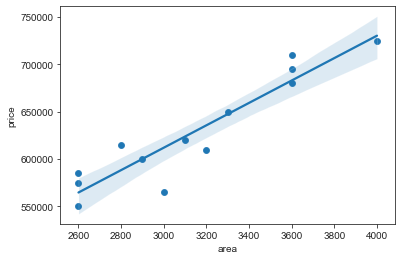

In [48]:
import matplotlib.pyplot as plt
df.plot.scatter(x='area',y='price')
sns.regplot(x='area',y='price',data=df)

In [36]:
reg.predict([[3400,1,0]])

array([641227.69296925])

In [37]:
reg.predict([[4000,1,0]])

array([717366.15781551])

In [38]:
reg.predict([[4000,0,1]])

array([743052.56933991])

In [39]:
reg.predict([[4000,0,0]])

array([757380.13330465])